# Building up

Here we can download the data and start to set up the data
There is all the main traing code

In [185]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# YOU MAY NEED TO CHANGE THIS PATH....
folder_path = '/content/drive/MyDrive/real_data'
pixels_size = 28

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((pixels_size, pixels_size)),
                                transforms.Normalize((0.5,), (0.5,)),
                                transforms.Grayscale(),
                                ])

# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/',
                          download=True,
                          train=True,
                          transform=transform)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=64,
                                          shuffle=True)

optimizer = optim.SGD(model.parameters(), lr=0.01)

criterion = nn.NLLLoss()


# Start Training

Now we are doing loops to train the data

Length of trainloader:938
       Start . . . . . . . . . . END
Epoch 1 - Training loss: 1.0853694377423349
       Start . . . . . . . . . . END
Epoch 2 - Training loss: 0.3876825296866106
       Start . . . . . . . . . . END
Epoch 3 - Training loss: 0.32751732951065876
       Start . . . . . . . . . . END
Epoch 4 - Training loss: 0.2956992319739386
       Start . . . . . . . . . . END
Epoch 5 - Training loss: 0.27126672294443605
       Start . . . . . . . . . . END
Epoch 6 - Training loss: 0.250426931898477
       Start . . . . . . . . . . END
Epoch 7 - Training loss: 0.23217298763234223
       Start . . . . . . . . . . END
Epoch 8 - Training loss: 0.21446147847023092
       Start . . . . . . . . . . END
Epoch 9 - Training loss: 0.19821615172411078
       Start . . . . . . . . . . END
Epoch 10 - Training loss: 0.18365382880909736


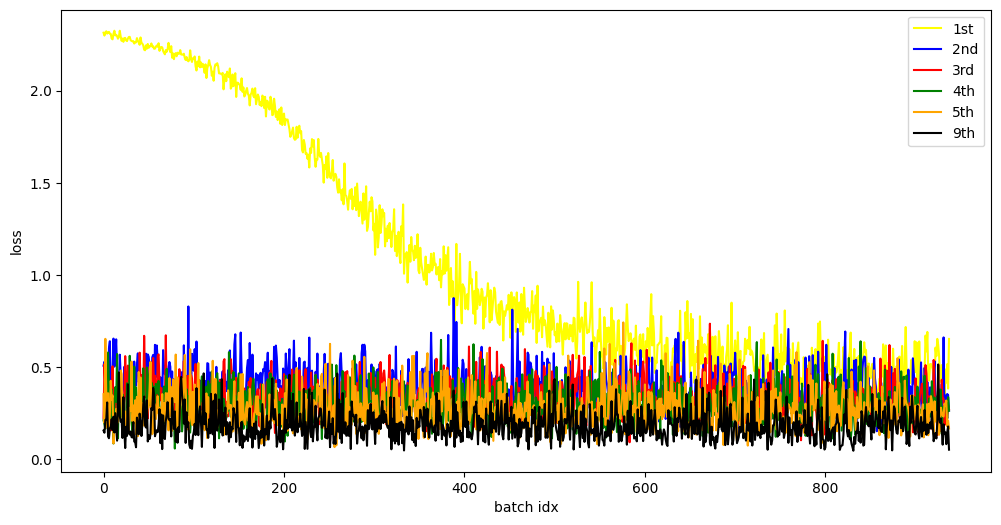

In [186]:
x = np.arange(938)
losses = [[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

print (f"Length of trainloader:{len(trainloader)}")

for epoch in range(10):
  total_loss = 0
  print("          Start", end=" ")
  for index, (tuple_images,tuple_label) in enumerate(trainloader):

    # parse tuple data
    image = tuple_images
    label = tuple_label

    # manipulate data
    image = image.view(image.shape[0], -1)
    optimizer.zero_grad()
    output = model(image)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()

    # get data for graph
    total_loss += loss.item()
    losses[epoch].append(loss.item())
    if index % 100 == 0:
      print(".", end=" ")

  print("END")
  print(f"Epoch {epoch+1} - Training loss: {total_loss/len(trainloader)}")


plt.figure(figsize=[12, 6])
plt.plot(x, losses[0], color='yellow', label="1st")
plt.plot(x, losses[1], color='b', label="2nd")
plt.plot(x, losses[2], color='r', label="3rd")
plt.plot(x, losses[3], color='g', label="4th")
plt.plot(x, losses[4], color='orange', label="5th")
plt.plot(x, losses[9], color='black', label="9th")
plt.xlabel('batch idx')
plt.ylabel('loss')
plt.legend()
plt.show()



# Try it out

Here is what the results are for our trained Model


tensor([[7.4509e-07, 4.8901e-06, 4.2748e-03, 9.9533e-01, 2.3302e-07, 1.6009e-04,
         1.0493e-06, 1.0865e-07, 2.2935e-04, 3.9237e-07]])
tensor(3)


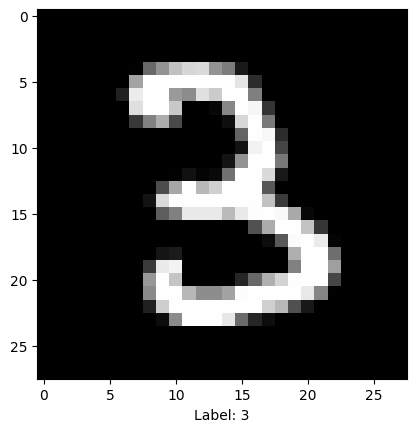

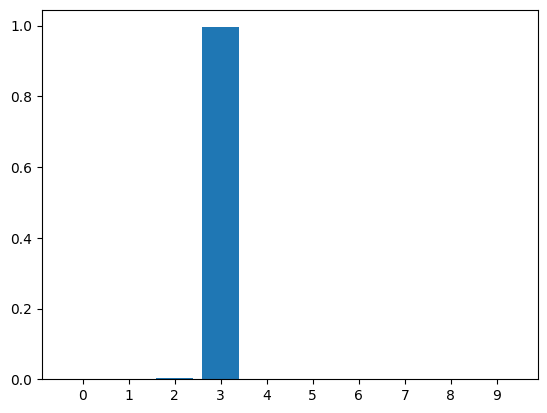

In [191]:
graph_labels = ["0","1","2","3","4","5","6","7","8","9"]

images, labels = next(iter(trainloader))

img = images[33].view(1, 784)
print_out = images[33]
true_label = labels[33]


with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)

A1 = plt.figure(1)
plt.xlabel('Label: '+ str(true_label.item()))
plt.imshow(print_out.permute(1,2,0), cmap='gray')
A1.show()

probabilities = ps[0]

A2 = plt.figure(2)
plt.bar(graph_labels, probabilities)
A2.show()

print(ps)
print(true_label)

# Trying out real data



Percentage  Correct: 34.10%
Guess Sample Number: 8



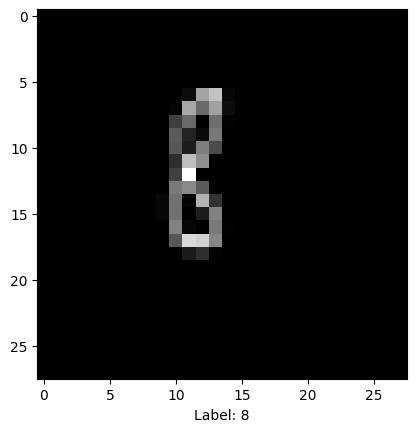

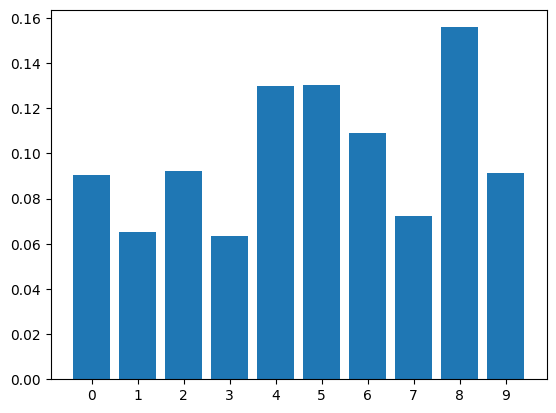

In [198]:
transform = transforms.Compose([
    transforms.Resize((pixels_size, pixels_size)),
    transforms.ToTensor(),
    transforms.Grayscale()
])

real_data = datasets.ImageFolder(folder_path,
                                 transform=transform)

loaded_real_data = torch.utils.data.DataLoader(real_data,
                                               batch_size=1000,
                                               shuffle=True)

losses_array = []
how_many_correct = 0
guess_sample_index = 0
images, labels = next(iter(loaded_real_data))

selected_image = images.view(images.shape[0], -1)
print_out = images[0]
true_label = labels[0]
true_label_array = labels

with torch.no_grad():
  logps_tensor = model(selected_image)

ps_array = torch.exp(logps_tensor)


# to get the percent of how many correct
for index in range(1000):

  chosen_index = 0
  for ID_comapre in range(1 , 10):
    if ps_array[index][ID_comapre] > ps_array[index][chosen_index]:
      chosen_index = ID_comapre

  if str(chosen_index) == str(true_label_array[index].item()):
    how_many_correct += 1
  if index == 0:
    guess_sample_index = chosen_index

percet = f"{how_many_correct/1000:.2%}"
print("Percentage  Correct: "+ str(percet))
print("Guess Sample Number: " + str(guess_sample_index) + "\n")

# Print out charts of one sample
A1 = plt.figure(1)
plt.xlabel('Label: '+ str(true_label.item()))
plt.imshow(print_out.permute(1,2,0), cmap='gray')
A1.show()

probabilities = ps_array[0]

A2 = plt.figure(2)
plt.bar(graph_labels, probabilities)
A2.show()